# Temperature Predicrion

# Data Set Information :
    
    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the 
    LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer 
    data from 2013 t0 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum
    and minimum temperatures of present-day and geographic auxiliary variables. There are two outputs (i.e. next.day maximum and minimum air temperatures) in this data Hindcast validation was conducted for the period from 2015 to 2017. 

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
import warnings
from sklearn.utils import shuffle
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# reading the csv file from dataset
df = pd.read_csv("temperature.csv")
pd.set_option("display.max_columns",None)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Here we have imported the dataset using pd.read_csv and set the option to display all the columns present in the dataset. 

The dataset contains the details of summer temperature data. In the dataset there are two target columns, one is Next_Tmax and Next_Tmin .
- Since both the output attributes are continuous in nature so it termed to be a Regression Type problem.

In [3]:
df.shape     

(7752, 25)

Here we can notice there are 7752 rows and 25 columns present in the dataset.

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here checking the data types of all attributes and we can notice here that only 1 object and all other numerical columns are present in data

<AxesSubplot:>

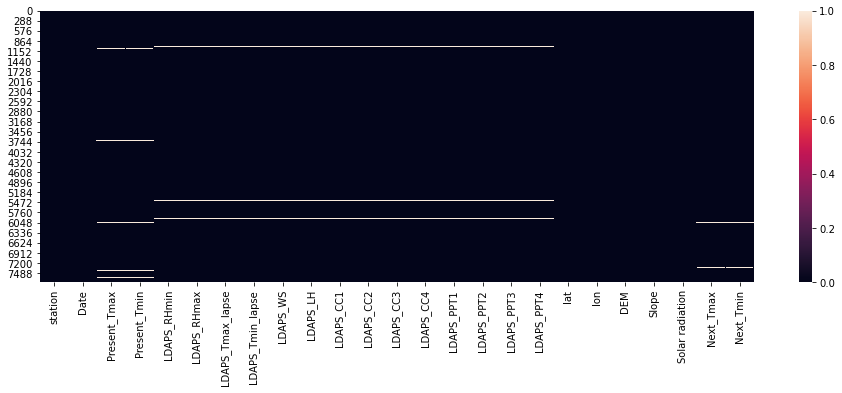

In [5]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())

Here in the above cell looking for null values if any, in heatmap

And we can see here the white lines present which  are the null values .

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

so here we can see almost every columns there are null values present.

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)
df[df.isna().any(axis=1)]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,0.890438,0.634022,0.371975,0.352818,2.645991,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,0.736160,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,0.857962,0.966186,0.959959,0.902762,4.435039,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.785000,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,0.392393,0.219702,0.293890,0.178251,0.000000,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.785000,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,0.517181,0.231422,0.276836,0.203288,0.000000,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.855200,5681.875000,30.7,23.4
627,3.0,25-07-2013,NaN,NaN,43.809799,86.972778,32.293370,24.725570,6.998412,12.913524,0.139798,0.107687,0.068822,0.015787,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5553.048828,31.3,23.3
831,7.0,02-08-2013,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5357.705566,NaN,NaN
856,7.0,03-08-2013,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,0.322410,0.071169,0.173785,0.004247,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5332.515625,NaN,NaN
881,7.0,04-08-2013,NaN,NaN,75.457825,92.582436,30.168241,26.228888,6.921643,99.902727,0.151918,0.261953,0.228145,0.131788,0.000000,0.000000,0.038057,0.000000,37.5776,126.838,12.3700,0.098500,5306.734863,30.7,25.8
913,14.0,05-08-2013,NaN,NaN,76.040504,94.029243,30.563506,26.743236,7.776664,32.352678,0.278550,0.380058,0.391610,0.168724,0.000000,0.373245,0.059894,0.000000,37.4967,126.927,30.9680,0.618000,5287.500977,28.8,22.2


- It's good to drop Null values rows because in one row we have multiple missing values.

If we'll replace it with mean , median than it'll mislead us. So we are dropping the null values.

In [8]:
# dropping all null values
df=df.dropna()

In [9]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

So finally all the null values are removed from the dataset.

# EDA

In [10]:
dfcor=df.corr()

<AxesSubplot:>

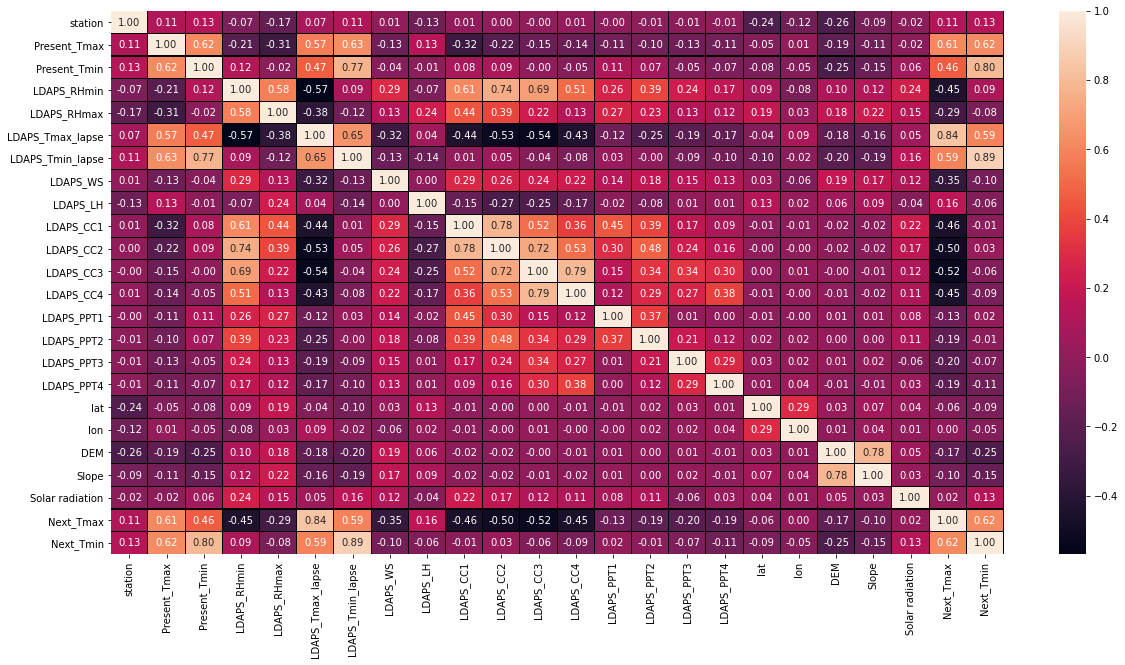

In [11]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

- We can see there Present_Tmax and Present_Tmin are highly correlated with Target variables.
- LDAPS_RHmm and LDAPS_RHmax are also highly correlated with target variables.
- Next_Tmin and Next_Tmax are also highly correlated with each other.
- Most of the columns are negatively correlated with target variables. 

In [12]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

So these are the columns present in the dataset.

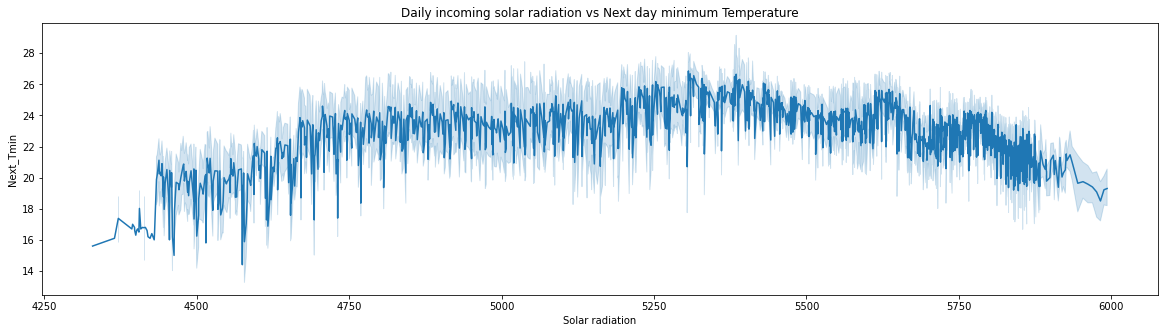

In [13]:
# lineplot Deisplay distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

- According to solar radiation, the next day minimum temperature is frequently increasing.

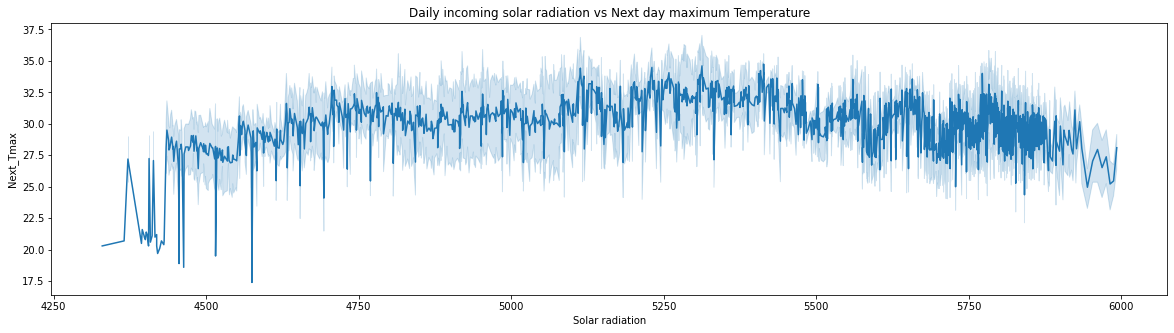

In [14]:
# lineplot Display distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

- According to solar radiation, the next day maximum temperature is frequently incresing.

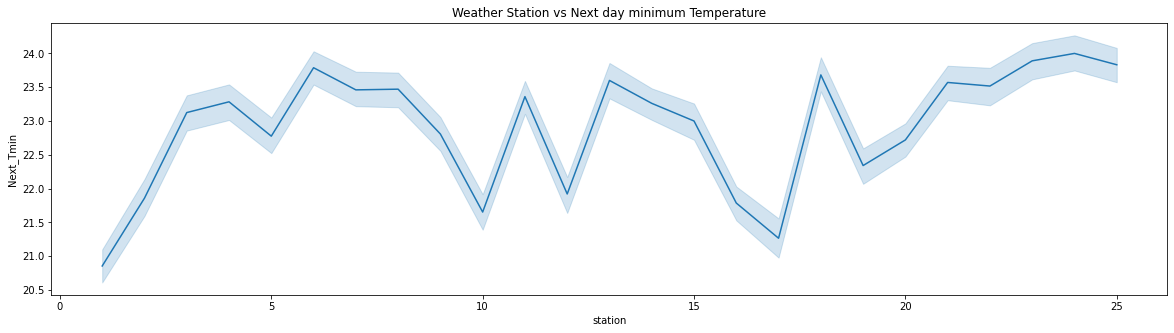

In [15]:
# lineplot Display distribution of data across Weather Station vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

- The line plot clears that next day minimum temperature is high & low at station 18 & 17 respectively.

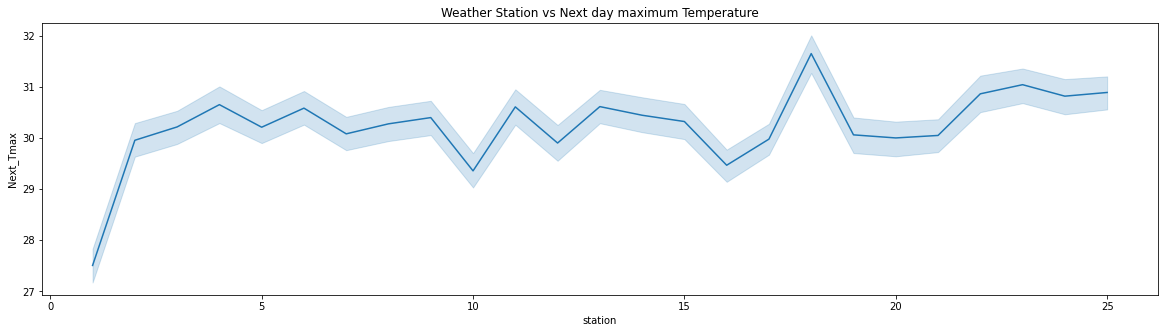

In [16]:
# lineplot Display distribution of data across Weather Station vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

- The line plot clears that next day maximum temperature is high & low at station 18 and 10 respectively.

Text(0, 0.5, 'Next_Tmax')

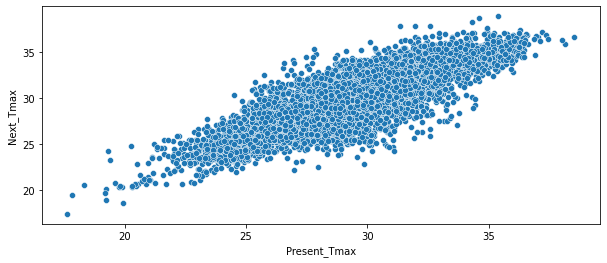

In [17]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'],df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

- With LDAPS_Tmax_lapse temp is also getting higher.

Text(0, 0.5, 'Next_Tmin')

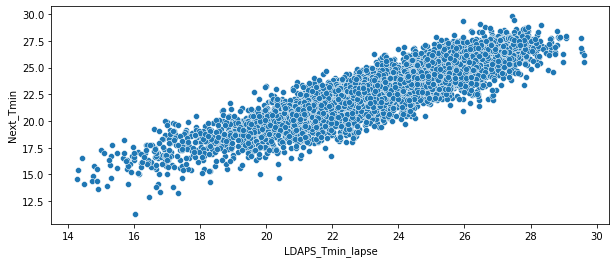

In [18]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmin')

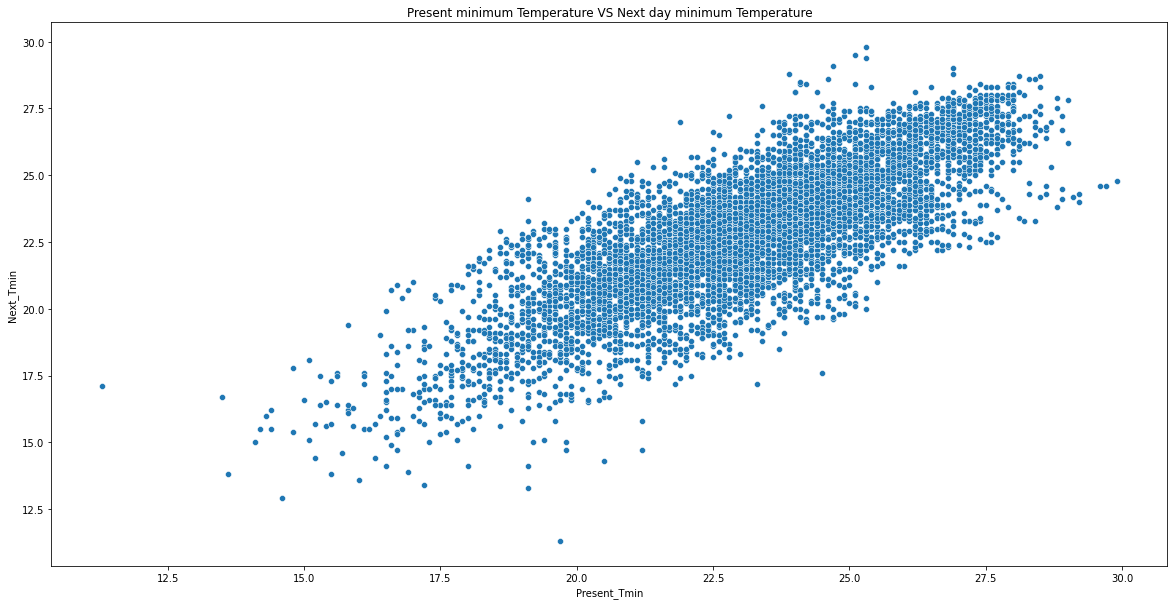

In [19]:
# scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

- Here we can notice when Present_Tmin in decreasing, Next_Tmin also getting lower.

Text(0, 0.5, 'Next_Tmax')

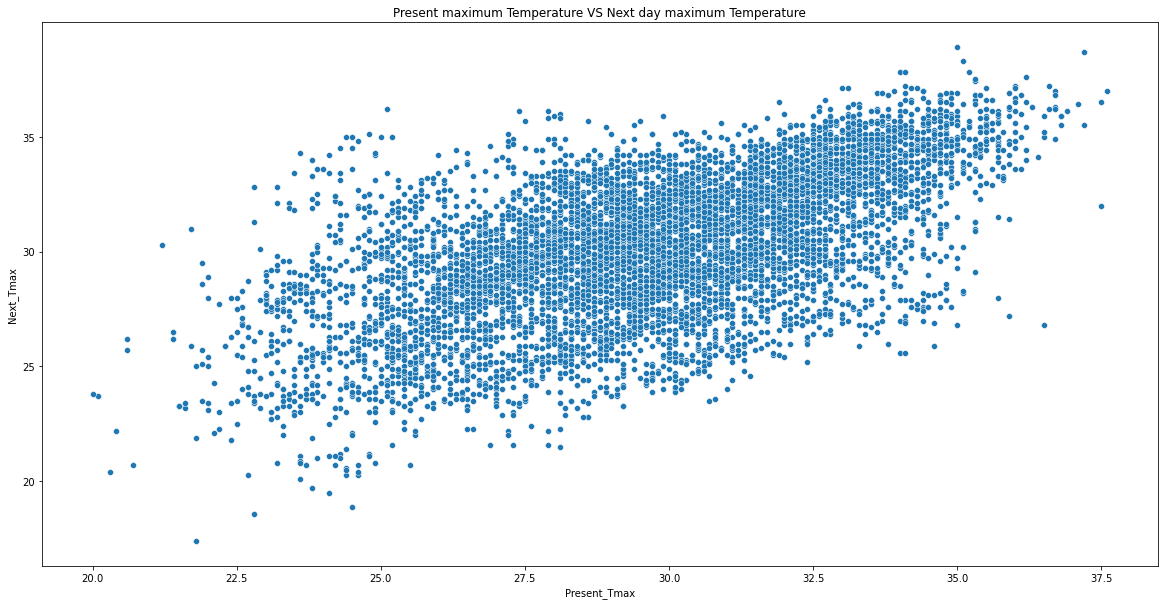

In [20]:
# scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Here we can see when Present_Tmax is increasing Next_Tmax is also getting higher

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

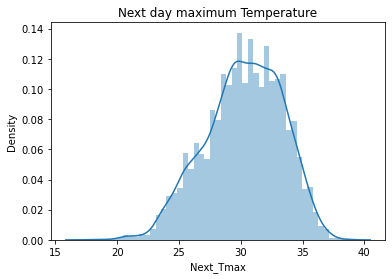

In [21]:
# Distplot Display distribution of data across Next day maximum Temperature
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

- The distplot clears that next day maximum temperatue distribution is lies between 22 to 37 

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

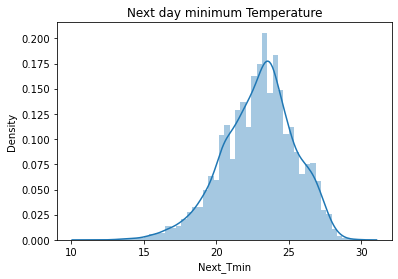

In [22]:
# Distplot Display distribution of data across Next day minimum Temperature
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

- The distplot clears that next day minimum temperature distribution is lies between 15 to 28 

In [23]:
import datetime as ddt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(ddt.datetime.toordinal)

In [24]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [25]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [27]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Here with help of Label Encoder converted one object type column into numerical 

In [28]:
# statistical summary for numerical columns
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,735795.210727,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,520.426996,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,734875.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,735806.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,736199.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


This gives the statistical information of the numerical columns. The summary of this dataset looks perfect since there is no negative/invalid values present

From the above description we can observe the following things.

- The counts of all the 3 columns are same which means there are no missing values in the dataset.
- In few column the mean value is greater than the median(50%) which means the data is skewed to right in these columns
- And in few columns the mean vlaue is less than the median which means the data is skewed to left in these columns.
- By summarising the data we can observe there is huge difference between 75% and max  hence there are outliers present in the data which we will remove them later on using appropriate methods.
- We can also notice the Standard deviation, min, 25% percentile values from this describe method.

# Skewness Handling

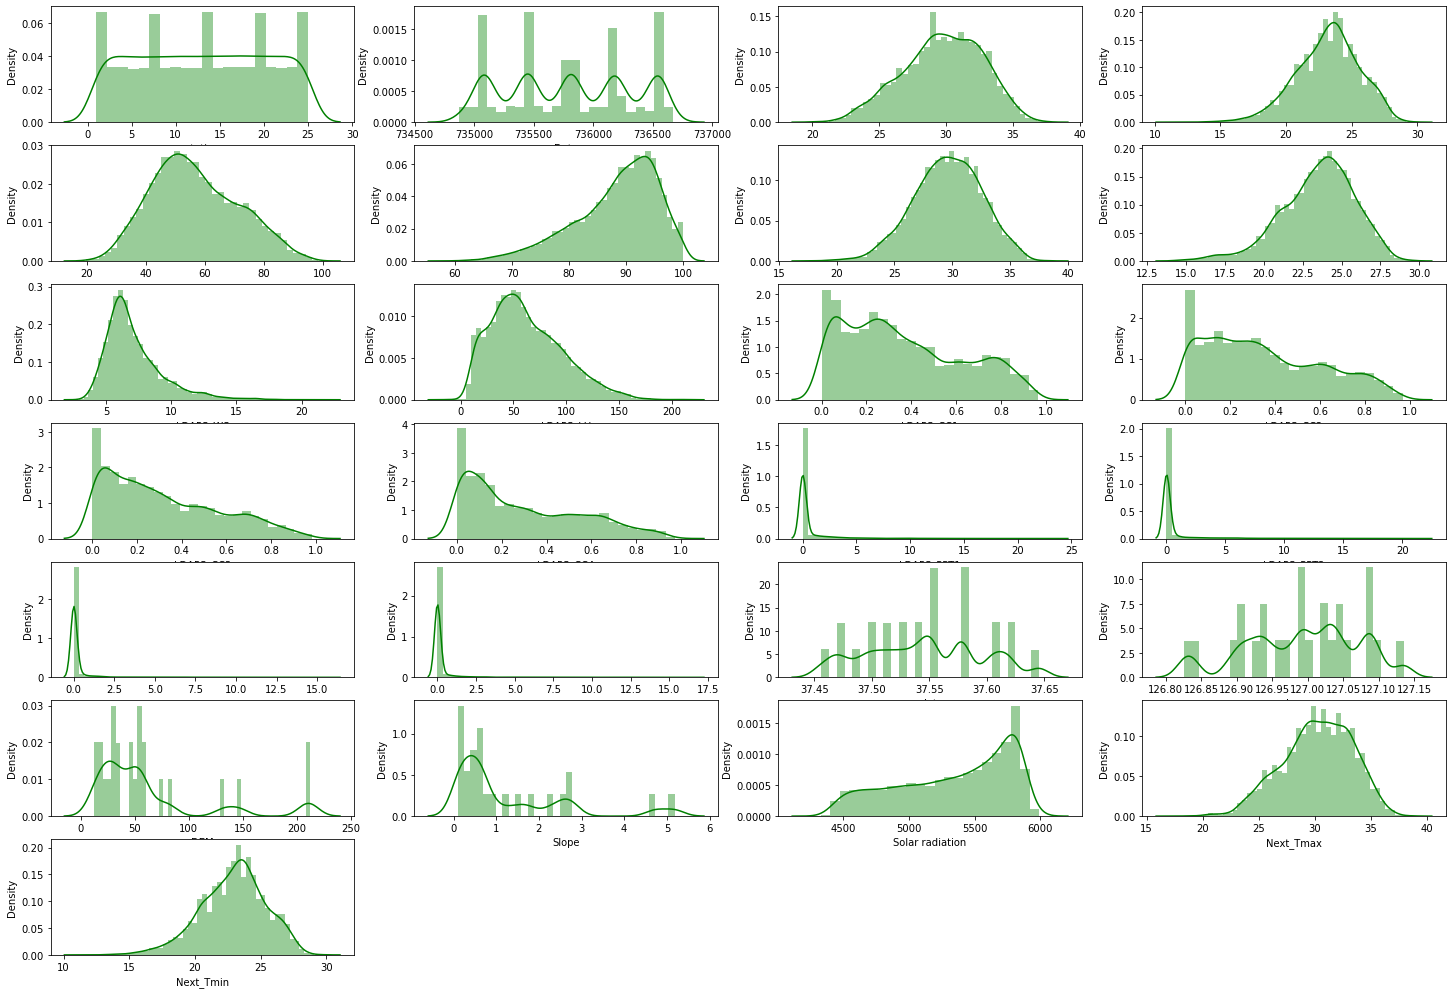

In [29]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [30]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

skewness more than +/-0.5 will we treated

Here we can see  most of the columns are skewed so let's treat them 

In [31]:
# Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [32]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

- We can see here skewness is removed in most of the columns, this the best result we got now cant treat more.

# Outliers Handling

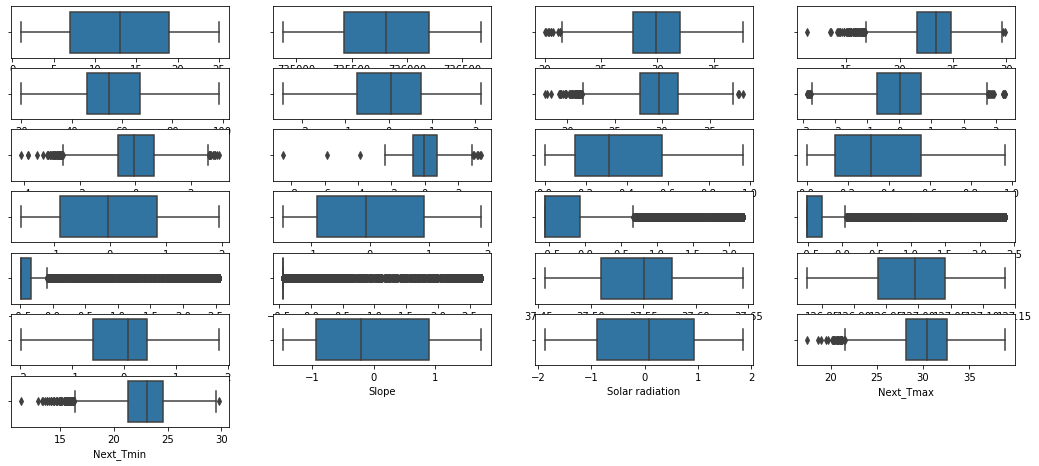

In [33]:
plt.figure(figsize=(18,10))
for i in enumerate(df):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df[i[1]])

- Only some columns seems having outliers after skewness removed.

# Outliers Removal

# ZSCORE METHOD

In [34]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([1751, 2091, 2154, 2316, 2413, 2425, 2591, 2599, 2633, 2699, 2700,
       2708, 2733, 3123, 3141, 3147, 3148, 3148, 3166, 3172, 3173, 3223,
       3435, 3437, 3481, 3522, 4281, 4506, 4531, 4656, 4708, 4964, 4989,
       4989, 5014, 5379, 5675, 5949, 5959, 5967, 5972, 5973, 5982, 5983,
       5991, 5997, 5998, 6007, 6007, 6008, 6016, 6023, 6032, 6032, 6033,
       6035, 6041, 6048, 6048, 6050, 6051, 6057, 6057, 6057, 6057, 6058,
       6058, 6058, 6059, 6059, 6060, 6060, 6061, 6061, 6062, 6063, 6063,
       6065, 6065, 6066, 6066, 6066, 6067, 6068, 6068, 6068, 6069, 6069,
       6071, 6071, 6072, 6072, 6073, 6073, 6073, 6074, 6075, 6075, 6076,
       6076, 6077, 6117, 6140, 6957, 6970, 6971, 6979, 6980, 6981, 7450,
       7457, 7474, 7481, 7506, 7515, 7515, 7539, 7539, 7539, 7539, 7539,
       7540, 7547, 7549, 7553, 7554, 7556, 7557, 7557, 7563, 7563, 7563,
       7564, 7564, 7571, 7572, 7572, 7574, 7578, 7579, 7579, 7581, 7582],
      dtype=int64), array([ 9,  8,  8,  9,  8,  8

In [35]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (7482, 25)


So using zscore  we loss 106 rows.

# IQR

In [36]:
from scipy import stats
IQR = stats.iqr(df)
IQR

28.295692022675517

In [37]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

df_out = df[~((df < (Q1 -1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(4175, 25)


So here using IQR we are loosing 3413 rows  which is huge.

Considering ZSCORE  because there is huge dataloss in IQR

In [38]:
df = df_1

In [39]:
df.shape

(7482, 25)

# Dividing data into X and Y

# seperating both variables into different part

In [40]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"],axis=1)

# Scaling X values

In [41]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [42]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [43]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,0.501186,0.509684,0.524215,0.518952,0.478379,0.534166,0.512332,0.496265,0.502246,0.449460,0.380178,0.365900,0.446778,0.436777,0.202964,0.178623,0.159197,0.139984,0.467472,0.534534,0.517696,0.457122,0.500662
std,0.300817,0.289936,0.178005,0.167536,0.188264,0.217919,0.165367,0.168151,0.165908,0.185071,0.270627,0.264930,0.281070,0.296196,0.363457,0.343898,0.325249,0.316496,0.265863,0.256506,0.261169,0.310512,0.269194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.304566,0.402439,0.405797,0.339805,0.372706,0.399635,0.378753,0.396182,0.319020,0.151486,0.145215,0.197342,0.175217,0.000000,0.000000,0.000000,0.000000,0.286017,0.359223,0.365938,0.168189,0.260976
50%,0.500000,0.517817,0.530488,0.528986,0.456551,0.544951,0.517123,0.497380,0.492863,0.440208,0.325486,0.321408,0.437407,0.416793,0.000000,0.000000,0.000000,0.000000,0.500530,0.546926,0.541902,0.395934,0.529160
75%,0.750000,0.736080,0.658537,0.630435,0.611875,0.697736,0.630420,0.610937,0.614247,0.582514,0.590918,0.572154,0.686604,0.711403,0.172848,0.077072,0.047119,0.000000,0.643008,0.699029,0.635218,0.738876,0.749576
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So here we can see data have been scalled

# Model Building

# Next_Tmax

# Linear Regression

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Checking the best Random State for Data Split

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test,predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is ",maxR2_Score," on Random_state",maxRS)

Best accuracy is  0.7865417850886561  on Random_state 225


In [46]:
# spliting data 70% for train and 30% for test
x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [47]:
# importing all the required libraries to find best Algorithm.
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [48]:
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), Ridge(), SVR()]
for m in model:
    print("-------------------------------------------------------------")
    print('accuracy score of : ',m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared Error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    
    print("Cross Validation Score:  ",score.mean())
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y1_test,pred)-abs(score.mean()))
    print("----------------------------------------------------------------")
    

-------------------------------------------------------------
accuracy score of :  LinearRegression()
R2 Score:                 0.7865417850886561
Mean Absolute Error:      1.076749022706879
Mean Squared Error:       2.0104546088137223
Root Mean Squared Error:  1.4179050069781551
[0.59381378 0.69539358 0.62136392 0.64180942 0.72098866 0.73331502
 0.77371424 0.64118124]
Cross Validation Score:   0.6776974835922613
Difference between R2 score and Cross Validation Score is :   0.10884430149639479
----------------------------------------------------------------
-------------------------------------------------------------
accuracy score of :  RandomForestRegressor()
R2 Score:                 0.9124014981024436
Mean Absolute Error:      0.681840089086859
Mean Squared Error:       0.8250458383073487
Root Mean Squared Error:  0.9083203390364815
[0.65675428 0.70925476 0.62818889 0.569121   0.71350146 0.73861795
 0.75380839 0.64927162]
Cross Validation Score:   0.677314792401481
Difference betw

# Observation :
     
        Choosing :
            
            Ridge as final score for Hyper Parameter Tuning because the difference between the R2 score and Cross Validation score is minimum compare to other models 

# Hyper Parameter Tuning

# with Ridge for Next_Tmax

In [49]:
# import the randomized search CV
parameters = {'max_iter' :[0,10,20],
              'random_state' :[15,16,17],
              'solver' : [ 'auto', 'svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf =GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_        # best parameters

{'max_iter': 10, 'random_state': 17, 'solver': 'sag'}

In [50]:
clf_pred=clf.best_estimator_.predict(x_test)

In [51]:
r2_score(y1_test, clf_pred)

0.7864940662296307

- Our model learnt almost 78.65% for Next_Tmax

# Saving the Model

In [52]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load("Temperature_Tmax.obj")
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([28.81968481, 29.5082694 , 26.44732951, ..., 30.27594155,
       31.84283474, 31.90465005])

In [53]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

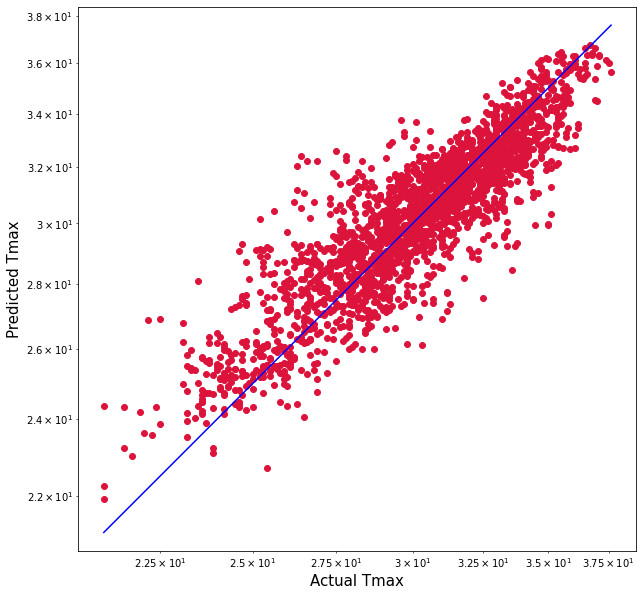

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

# Next_Tmin

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test,predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is ",maxR2_Score," on Random_state",maxRS)

Best accuracy is  0.8426992521640574  on Random_state 68


In [58]:
# spliting data 70% for train and 30% for test
x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [59]:
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), Ridge(), SVR()]
for m in model:
    print("-------------------------------------------------------------")
    print('accuracy score of -> ',m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared Error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    
    print("Cross Validation Score:  ",score.mean())
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y2_test,pred)-abs(score.mean()))
    print("----------------------------------------------------------------")
    

-------------------------------------------------------------
accuracy score of ->  LinearRegression()
R2 Score:                 0.8426992521640574
Mean Absolute Error:      0.7592224580092167
Mean Squared Error:       0.9275271732671061
Root Mean Squared Error:  0.9630821217669374
[0.51198221 0.83772098 0.63977498 0.75502167 0.80512725 0.80896123
 0.85169085 0.8702346 ]
Cross Validation Score:   0.7600642203105247
Difference between R2 score and Cross Validation Score is :   0.08263503185353271
----------------------------------------------------------------
-------------------------------------------------------------
accuracy score of ->  RandomForestRegressor()
R2 Score:                 0.9073564003512925
Mean Absolute Error:      0.5690213789417423
Mean Squared Error:       0.5462749369321215
Root Mean Squared Error:  0.7391041448484249
[0.47046817 0.78406479 0.65834669 0.77568306 0.81571422 0.82805766
 0.85448224 0.87862102]
Cross Validation Score:   0.7581797303395565
Difference

Observation :
    
    Choosing :
        
        Linear Regression as final score for Hyper Parameter Tuning because the difference between the R2 score and Cross Validation Score is minimum compare to other models.

# Hyper Parameter Tuning

# with Linear Regression for Next_Tmin

In [63]:
# import the randomized search CV
parameters = {'fit_intercept' :[True],
              'n_jobs' :[-1],
              'normalize' :[False],
              'positive' :[False]}
LR=LinearRegression()

clf =GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_        # best parameters

{'fit_intercept': True, 'n_jobs': -1, 'normalize': False, 'positive': False}

In [64]:
clf_pred=clf.best_estimator_.predict(x_test)

In [65]:
r2_score(y2_test, clf_pred)

0.8426992521640574

- Our model learnt almost 84.26% for Next_Tmin

# Saving the Model

In [66]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load("Temperature_Tmin.obj")
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([21.56380327, 20.49063693, 18.91226117, ..., 22.17401202,
       22.71903869, 21.62541602])

In [67]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

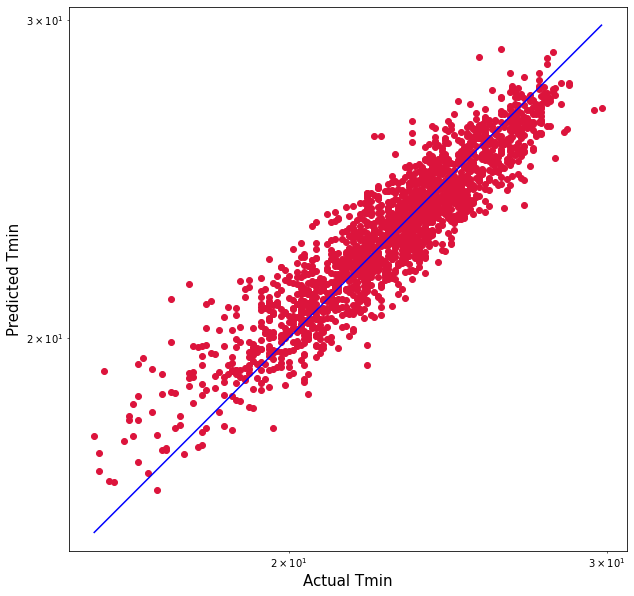

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()